In [1]:
from carla_disentanglement.datasets.dsprites import DSpritesDataset, DSpritesDatasetMini
import numpy as np
from models.annealed_vae import AnnealedVAE
from models.beta_tcvae import BetaTCVAE
from models.beta_vae import BetaVAE, VAEModule
from models.info_vae import InfoVAE
from models.geco_vae import GecoVAE
from architectures.SimpleConv64 import *
from architectures.Conv64 import *
# from architectures.ResConv import *
# from architectures.ResConv64 import *
from architectures.LeakyConv64 import *
from architectures.LConv64 import *
from architectures.LSConv64 import *
from architectures.LSConv64Stride1 import *
from architectures.InvRes import *
import torch
import random


In [2]:
ds = DSpritesDataset()

In [3]:
seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [4]:
z_dim = 10
num_channels = 1
image_size = 64
batch_size=256

In [5]:
# vae = AnnealedVAE(GaussianConv64(z_dim, num_channels, image_size), Conv64Decoder(z_dim, num_channels, image_size), beta=100.0, max_c=20, iterations_c=2)
# vae = AnnealedVAE(SimpleGaussianConv64(z_dim, num_channels, image_size), SimpleConv64Decoder(z_dim, num_channels, image_size), beta=50.0, max_c=20, iterations_c=4)
# vae = AnnealedVAE(GaussianConv64(z_dim, num_channels, image_size), Conv64Decoder(z_dim, num_channels, image_size), beta=100.0, max_c=20, iterations_c=8, reconstruction='mse')
# vae = AnnealedVAE(Encoder(num_channels, z_dim, , image_size), Decoder(z_dim, num_channels, image_size), beta=100.0, max_c=20, iterations_c=8, reconstruction='mse')
# vae = BetaTCVAE(SimpleGaussianConv64(z_dim, num_channels, image_size), SimpleConv64Decoder(z_dim, num_channels, image_size), beta=10.0, reconstruction='mse')

#vae = AnnealedVAE(GaussianResConv64(z_dim, num_channels, image_size), ResConv64Decoder(z_dim, num_channels, image_size), gamma=100.0, max_c=20, iterations_c=1e5, reconstruction='bce')
# vae = BetaVAE(GaussianResConv64(z_dim, num_channels, image_size), ResConv64Decoder(z_dim, num_channels, image_size))
# vae = BetaVAE(GaussianLConv64(z_dim, num_channels, image_size), LConv64Decoder(z_dim, num_channels, image_size))
# vae = AnnealedVAE(GaussianLConv64(z_dim, num_channels, image_size), LConv64Decoder(z_dim, num_channels, image_size), gamma=100.0, max_c=20, iterations_c=1e5, reconstruction='bce')
# vae = AnnealedVAE(GaussianLeakyConv64(z_dim, num_channels, image_size), LeakyConv64Decoder(z_dim, num_channels, image_size), gamma=100.0, max_c=20, iterations_c=1e5, reconstruction='bce')

# vae = AnnealedVAE(InvertedResidualVAEModel(z_dim, num_channels), gamma=100.0, max_c=20, iterations_c=1e5/batch_size*64, reconstruction='bce', tag="dsprites")
# vae = AnnealedVAE(VAEModule(GaussianLeakyConv64(z_dim, num_channels, image_size), LeakyConv64Decoder(z_dim, num_channels, image_size)), gamma=100.0, max_c=20, iterations_c=1e5/batch_size*64, reconstruction='bce', tag="dsprites_leakysimple")
# vae = BetaVAE(InvertedResidualVAEModel(z_dim, num_channels), tag="dsprites", beta=5)
# vae = GecoVAE(InvertedResidualVAEModel(z_dim, num_channels), tolerance=10./255., lbd_step=500, beta=2.0, tag="dsprites_logits_tol10_beta2")
# vae = GecoVAE(VAEModule(GaussianLeakyConv64(z_dim, num_channels, image_size), LeakyConv64Decoder(z_dim, num_channels, image_size)), tolerance=5./255., lbd_step=100, tag="dsprites_simple")
# vae = AnnealedVAE(InvertedResidualVAEModel(z_dim, num_channels), gamma=100.0, max_c=20, iterations_c=1e5/batch_size*64, reconstruction='mse_logits', tag="dsprites_mse_logits")
# vae = AnnealedVAE(VAEModule(GaussianLeakyConv64(z_dim, num_channels, image_size), LeakyConv64Decoder(z_dim, num_channels, image_size)), gamma=50.0, max_c=20, iterations_c=1e5/batch_size*64, reconstruction='mse', tag="dsprites_leakysimple_mse")

vae = BetaTCVAE(InvertedResidualVAEModel(z_dim, num_channels), beta=5.0, tag="dsprites")
# vae = GecoVAE(InvertedResidualVAEModel(z_dim, num_channels), tolerance=10./255., lbd_step=500, lambda_init=0.1, beta=1.0, tag="dsprites_tol20_lmb.1")

vae.model.activation

cuda


Sigmoid()

In [6]:
vae.initOptimizer(lr=5e-4) #, betas=(0.9,0.999)

In [7]:
vae.train(ds, epochs=41, reconstruction_every=1, eval_every=1, save_every=10, score_every=10, batch_size=batch_size, num_workers=0, reconstruct_indices=[0,4300, 200000, -554, -20000, int(737280/2+500)])

  0%|          | 3/720 [00:00<00:26, 26.63it/s]

{'epoch': 0, 'step': 2160, 'loss': 22.963196, 'last_save': None}


100%|██████████| 720/720 [00:36<00:00, 19.82it/s]
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.05


  0%|          | 0/2160 [00:00<?, ?it/s]

{'beta_vae_score': {'train_accuracy': 0.5433, 'eval_accuracy': 0.5304}, 'factor_vae_score': {'train_accuracy': 0.3614, 'eval_accuracy': 0.3522, 'num_active_dims': 10}}


  0%|          | 3/720 [00:00<00:27, 26.46it/s]

{'epoch': 1, 'step': 4320, 'loss': -89.60785, 'last_save': 'vae_1_2021-11-15_09-30-05_-89.60785.save'}


  0%|          | 3/720 [00:00<00:27, 26.40it/s]

{'epoch': 2, 'step': 6480, 'loss': -100.17364, 'last_save': 'vae_2_2021-11-15_09-37-14_-100.17364.save'}


  0%|          | 3/720 [00:00<00:29, 24.57it/s]

{'epoch': 3, 'step': 8640, 'loss': -104.5669, 'last_save': 'vae_3_2021-11-15_09-44-20_-104.5669.save'}


  0%|          | 3/720 [00:00<00:27, 26.40it/s]

{'epoch': 4, 'step': 10800, 'loss': -106.99785, 'last_save': 'vae_4_2021-11-15_09-51-24_-106.99785.save'}


  0%|          | 3/720 [00:00<00:27, 26.21it/s]

{'epoch': 5, 'step': 12960, 'loss': -108.88432, 'last_save': 'vae_5_2021-11-15_09-58-29_-108.88432.save'}


  0%|          | 3/720 [00:00<00:27, 26.27it/s]

{'epoch': 6, 'step': 15120, 'loss': -110.458725, 'last_save': 'vae_6_2021-11-15_10-05-33_-110.458725.save'}


  1%|          | 5/720 [00:00<00:29, 23.98it/s]

{'epoch': 7, 'step': 17280, 'loss': -111.80357, 'last_save': 'vae_7_2021-11-15_10-12-37_-111.80357.save'}


  0%|          | 3/720 [00:00<00:27, 25.84it/s]

{'epoch': 8, 'step': 19440, 'loss': -113.14081, 'last_save': 'vae_8_2021-11-15_10-19-41_-113.14081.save'}


  1%|          | 5/720 [00:00<00:29, 23.84it/s]

{'epoch': 9, 'step': 21600, 'loss': -114.67271, 'last_save': 'vae_9_2021-11-15_10-26-49_-114.67271.save'}


  0%|          | 3/720 [00:00<00:26, 26.63it/s]

{'epoch': 10, 'step': 23760, 'loss': -116.073, 'last_save': 'vae_10_2021-11-15_10-33-54_-116.073.save'}


100%|██████████| 720/720 [00:35<00:00, 20.05it/s]
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.05


  0%|          | 0/2160 [00:00<?, ?it/s]

{'beta_vae_score': {'train_accuracy': 0.5523, 'eval_accuracy': 0.5458}, 'factor_vae_score': {'train_accuracy': 0.4316, 'eval_accuracy': 0.4256, 'num_active_dims': 10}}


  0%|          | 3/720 [00:00<00:30, 23.60it/s]

{'epoch': 11, 'step': 25920, 'loss': -117.31885, 'last_save': 'vae_11_2021-11-15_10-44-55_-117.31885.save'}


  0%|          | 3/720 [00:00<00:28, 24.77it/s]

{'epoch': 12, 'step': 28080, 'loss': -118.44498, 'last_save': 'vae_12_2021-11-15_10-52-02_-118.44498.save'}


  0%|          | 3/720 [00:00<00:27, 26.01it/s]

{'epoch': 13, 'step': 30240, 'loss': -119.225784, 'last_save': 'vae_13_2021-11-15_10-59-08_-119.225784.save'}


  0%|          | 3/720 [00:00<00:26, 26.68it/s]

{'epoch': 14, 'step': 32400, 'loss': -119.92819, 'last_save': 'vae_14_2021-11-15_11-06-13_-119.92819.save'}


  0%|          | 3/720 [00:00<00:27, 26.02it/s]

{'epoch': 15, 'step': 34560, 'loss': -120.731064, 'last_save': 'vae_15_2021-11-15_11-13-12_-120.731064.save'}


  0%|          | 3/720 [00:00<00:27, 26.52it/s]

{'epoch': 16, 'step': 36720, 'loss': -121.231705, 'last_save': 'vae_16_2021-11-15_11-20-16_-121.231705.save'}


  0%|          | 3/720 [00:00<00:28, 25.40it/s]

{'epoch': 17, 'step': 38880, 'loss': -121.75877, 'last_save': 'vae_17_2021-11-15_11-27-23_-121.75877.save'}


  0%|          | 3/720 [00:00<00:26, 26.76it/s]

{'epoch': 18, 'step': 41040, 'loss': -122.182884, 'last_save': 'vae_18_2021-11-15_11-34-31_-122.182884.save'}


  0%|          | 3/720 [00:00<00:28, 25.34it/s]

{'epoch': 19, 'step': 43200, 'loss': -122.73865, 'last_save': 'vae_19_2021-11-15_11-41-41_-122.73865.save'}


  0%|          | 3/720 [00:00<00:28, 24.90it/s]

{'epoch': 20, 'step': 45360, 'loss': -123.048775, 'last_save': 'vae_20_2021-11-15_11-48-44_-123.048775.save'}


100%|██████████| 720/720 [00:36<00:00, 19.95it/s]
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.05


  0%|          | 0/2160 [00:00<?, ?it/s]

{'beta_vae_score': {'train_accuracy': 0.573, 'eval_accuracy': 0.573}, 'factor_vae_score': {'train_accuracy': 0.4431, 'eval_accuracy': 0.4382, 'num_active_dims': 10}}


  0%|          | 3/720 [00:00<00:27, 26.52it/s]

{'epoch': 21, 'step': 47520, 'loss': -123.440155, 'last_save': 'vae_21_2021-11-15_11-59-48_-123.440155.save'}


  0%|          | 3/720 [00:00<00:27, 26.06it/s]

{'epoch': 22, 'step': 49680, 'loss': -123.782684, 'last_save': 'vae_22_2021-11-15_12-06-26_-123.782684.save'}


  0%|          | 3/720 [00:00<00:27, 25.84it/s]

{'epoch': 23, 'step': 51840, 'loss': -124.13162, 'last_save': 'vae_23_2021-11-15_12-13-04_-124.13162.save'}


  0%|          | 3/720 [00:00<00:28, 24.77it/s]

{'epoch': 24, 'step': 54000, 'loss': -124.41002, 'last_save': 'vae_24_2021-11-15_12-20-07_-124.41002.save'}


  0%|          | 3/720 [00:00<00:28, 25.19it/s]

{'epoch': 25, 'step': 56160, 'loss': -124.74594, 'last_save': 'vae_25_2021-11-15_12-27-12_-124.74594.save'}


  0%|          | 3/720 [00:00<00:28, 25.17it/s]

{'epoch': 26, 'step': 58320, 'loss': -125.09801, 'last_save': 'vae_26_2021-11-15_12-34-16_-125.09801.save'}


  0%|          | 3/720 [00:00<00:28, 24.98it/s]

{'epoch': 27, 'step': 60480, 'loss': -125.32538, 'last_save': 'vae_27_2021-11-15_12-41-23_-125.32538.save'}


  0%|          | 3/720 [00:00<00:28, 24.98it/s]

{'epoch': 28, 'step': 62640, 'loss': -125.586395, 'last_save': 'vae_28_2021-11-15_12-48-27_-125.586395.save'}


  1%|          | 5/720 [00:00<00:31, 22.96it/s]

{'epoch': 29, 'step': 64800, 'loss': -125.94836, 'last_save': 'vae_29_2021-11-15_12-55-29_-125.94836.save'}


  0%|          | 3/720 [00:00<00:28, 25.19it/s]

{'epoch': 30, 'step': 66960, 'loss': -126.326035, 'last_save': 'vae_30_2021-11-15_13-02-31_-126.326035.save'}


100%|██████████| 720/720 [00:35<00:00, 20.06it/s]
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.05


  0%|          | 0/2160 [00:00<?, ?it/s]

{'beta_vae_score': {'train_accuracy': 0.587, 'eval_accuracy': 0.5914}, 'factor_vae_score': {'train_accuracy': 0.472, 'eval_accuracy': 0.4684, 'num_active_dims': 10}}


  0%|          | 3/720 [00:00<00:31, 22.64it/s]

{'epoch': 31, 'step': 69120, 'loss': -126.63564, 'last_save': 'vae_31_2021-11-15_13-14-03_-126.63564.save'}


  0%|          | 3/720 [00:00<00:30, 23.60it/s]

{'epoch': 32, 'step': 71280, 'loss': -126.91467, 'last_save': 'vae_32_2021-11-15_13-21-33_-126.91467.save'}


  0%|          | 3/720 [00:00<00:29, 23.98it/s]

{'epoch': 33, 'step': 73440, 'loss': -127.22804, 'last_save': 'vae_33_2021-11-15_13-28-56_-127.22804.save'}


  0%|          | 3/720 [00:00<00:28, 25.19it/s]

{'epoch': 34, 'step': 75600, 'loss': -127.68698, 'last_save': 'vae_34_2021-11-15_13-36-11_-127.68698.save'}


  0%|          | 3/720 [00:00<00:28, 24.77it/s]

{'epoch': 35, 'step': 77760, 'loss': -127.93097, 'last_save': 'vae_35_2021-11-15_13-43-13_-127.93097.save'}


  0%|          | 3/720 [00:00<00:28, 24.77it/s]

{'epoch': 36, 'step': 79920, 'loss': -128.25864, 'last_save': 'vae_36_2021-11-15_13-50-16_-128.25864.save'}


  0%|          | 3/720 [00:00<00:29, 24.57it/s]

{'epoch': 37, 'step': 82080, 'loss': -128.55064, 'last_save': 'vae_37_2021-11-15_13-57-18_-128.55064.save'}


  0%|          | 3/720 [00:00<00:29, 24.35it/s]

{'epoch': 38, 'step': 84240, 'loss': -128.83498, 'last_save': 'vae_38_2021-11-15_14-04-21_-128.83498.save'}


  0%|          | 3/720 [00:00<00:28, 24.77it/s]

{'epoch': 39, 'step': 86400, 'loss': -129.07846, 'last_save': 'vae_39_2021-11-15_14-11-24_-129.07846.save'}


  0%|          | 3/720 [00:00<00:30, 23.15it/s]

{'epoch': 40, 'step': 88560, 'loss': -129.38367, 'last_save': 'vae_40_2021-11-15_14-18-34_-129.38367.save'}


100%|██████████| 720/720 [00:37<00:00, 19.34it/s]
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.05
{'beta_vae_score': {'train_accuracy': 0.5907, 'eval_accuracy': 0.5892}, 'factor_vae_score': {'train_accuracy': 0.4849, 'eval_accuracy': 0.48, 'num_active_dims': 10}}
saved vae_2021-11-15_14-23-33_-129.38367.save


In [8]:
_ = vae.model.eval()

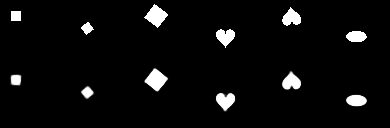

In [9]:
vae.visualize_reconstruction(ds, indices=[0,4300, 200000, -554, -20000, int(737280/2+500)])

In [10]:
vae.visualize_latents(ds, index=0)

'./viz/vae_2021-11-15_14-23-33.gif'

In [11]:
vae.visualize_latents(ds, index=-554)

'./viz/vae_2021-11-15_14-23-34.gif'